# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
# Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
company=pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Decision Tree\\Company_Data.csv")

In [4]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
#initial analysis
company.shape

(400, 11)

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:xlabel='Sales', ylabel='Density'>

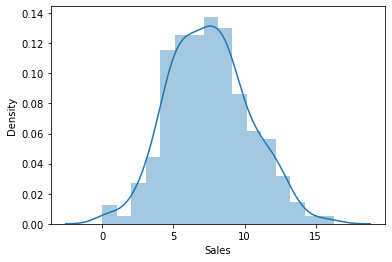

In [10]:
sns.distplot(company['Sales'])

In [11]:
company.Sales.nunique()

336

In [12]:
company.Sales.value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [13]:
company.Sales.max()

16.27

In [14]:
company.Sales.min()

0.0

In [15]:
company.Sales.median()

7.49

In [16]:
company[company.Sales<=7.49]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
393,5.57,109,51,10,26,120,Medium,30,17,No,Yes
394,5.35,130,58,19,366,139,Bad,33,16,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes


In [17]:
company[company.Sales>7.49]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
387,8.67,142,73,14,238,115,Medium,73,14,No,Yes
388,8.14,135,89,11,245,78,Bad,79,16,Yes,Yes
389,8.44,128,42,8,328,107,Medium,35,12,Yes,Yes
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes


In [18]:
16.27/3 #finding intervals to find low ,medium,high

5.423333333333333

In [19]:
16.27-5.43

10.84

In [20]:
10.48-5.43

5.050000000000001

In [21]:
company[company.Sales<=5.423]#low

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes
12,3.98,122,35,2,393,136,Medium,62,18,Yes,No
22,5.08,128,46,6,497,138,Medium,42,13,Yes,No
27,5.27,98,118,0,19,107,Medium,64,17,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
381,3.90,124,65,21,496,151,Bad,77,13,Yes,Yes
382,4.95,121,28,19,315,121,Medium,66,14,Yes,Yes
386,5.32,152,116,0,170,160,Medium,39,16,Yes,No
392,4.53,129,42,13,315,130,Bad,34,13,Yes,Yes


In [22]:
company[(company.Sales>5.423)&(company.Sales<10.84)]#medium

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
393,5.57,109,51,10,26,120,Medium,30,17,No,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [23]:
company[company.Sales>=10.84] #high

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
11,11.96,117,94,4,503,94,Good,50,13,Yes,Yes
13,10.96,115,28,11,29,86,Good,53,18,Yes,Yes
14,11.17,107,117,11,148,118,Good,52,18,Yes,Yes
17,12.29,147,74,13,251,131,Good,52,10,Yes,Yes
18,13.91,110,110,0,408,68,Good,46,17,No,Yes
21,12.13,134,29,12,239,109,Good,62,18,No,Yes
25,14.90,139,32,0,176,82,Good,54,11,No,No
30,13.55,125,94,0,447,89,Good,30,12,Yes,No


In [24]:
company[company.Sales>=10.84].shape

(51, 11)

In [25]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [26]:
company['sales_category']=' '

In [27]:
company.loc[company.Sales<=5.423,'sales_category']='low'

In [28]:
company.loc[(company.Sales>5.423)&(company.Sales<10.84),'sales_category']='medium'

In [29]:
company.loc[company.Sales>=10.84,'sales_category']='high'

In [30]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,medium
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,medium
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,medium


In [31]:
company.sales_category.nunique()

3

In [32]:
company.sales_category.value_counts()

medium    247
low       102
high       51
Name: sales_category, dtype: int64

<AxesSubplot:xlabel='sales_category', ylabel='count'>

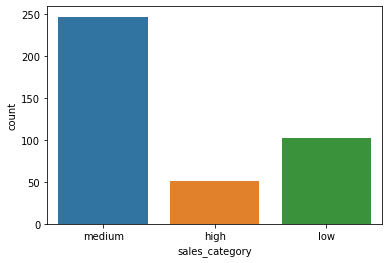

In [33]:
sns.countplot('sales_category',data=company)

In [34]:
company_data=company.copy()

In [35]:
company_data.drop(columns='Sales',axis=1,inplace=True)

In [36]:
company_data.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_category'],
      dtype='object')

In [37]:
#convert object into numeric
company_data.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [38]:
company_data.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [39]:
company_data.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
l_e=LabelEncoder()

In [42]:
company_data['ShelveLoc']=l_e.fit_transform(company_data['ShelveLoc'])
company_data['Urban']=l_e.fit_transform(company_data['Urban'])
company_data['US']=l_e.fit_transform(company_data['US'])

In [43]:
company_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,138,73,11,276,120,0,42,17,1,1,medium
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,1,1,medium
3,117,100,4,466,97,2,55,14,1,1,medium
4,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,high
396,139,23,3,37,120,2,55,11,0,1,medium
397,162,26,12,368,159,2,40,18,1,1,medium
398,100,79,7,284,95,0,50,12,1,1,medium


In [44]:
#train-test split
from sklearn.model_selection import train_test_split

In [45]:
x=company_data.drop(columns=["sales_category"],axis=1)
y=company_data[["sales_category"]]

In [46]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [47]:
x_train.shape,y_train.shape

((320, 10), (320, 1))

In [48]:
x_test.shape,y_test.shape

((80, 10), (80, 1))

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt_model=DecisionTreeClassifier()

In [51]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
y_train_pred=dt_model.predict(x_train)

In [53]:
y_train_pred.shape

(320,)

In [54]:
y_test_pred=dt_model.predict(x_test)

In [55]:
y_test_pred.shape

(80,)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [57]:
accuracy_score(y_train,y_train_pred)

1.0

In [58]:
accuracy_score(y_test,y_test_pred)

0.4625

In [59]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        high       0.62      0.57      0.59        14
         low       0.21      0.54      0.30        13
      medium       0.67      0.42      0.51        53

    accuracy                           0.46        80
   macro avg       0.50      0.51      0.47        80
weighted avg       0.58      0.46      0.49        80



In [60]:
confusion_matrix(y_test,y_test_pred)

array([[ 8,  1,  5],
       [ 0,  7,  6],
       [ 5, 26, 22]], dtype=int64)

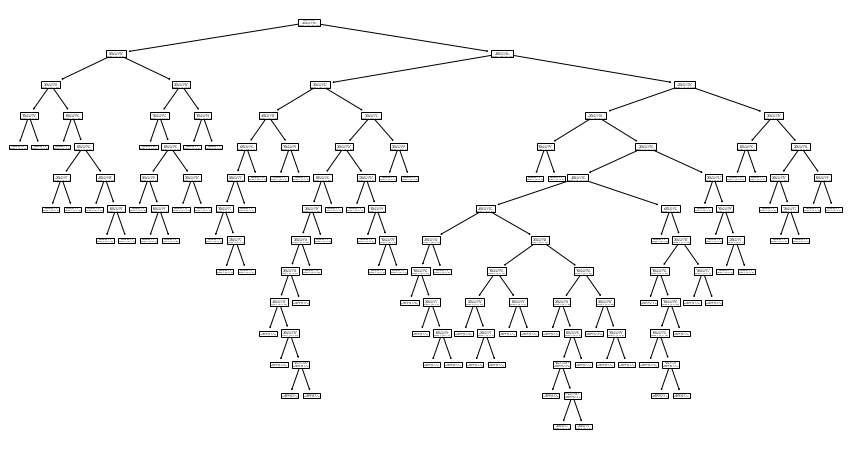

In [61]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(dt_model)
plt.show()

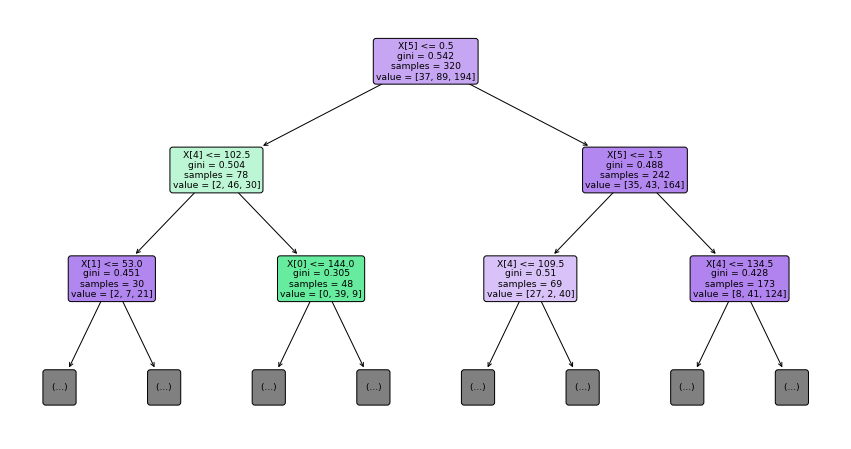

In [62]:
plt.figure(figsize=(15,8))
tree.plot_tree(dt_model,rounded=True,filled=True,max_depth=2)
plt.show()

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
grid_model=GridSearchCV(estimator=dt_model,param_grid={"criterion":["entropy","gini"],
                                                       "max_depth":[2,4,8,10]})

In [65]:
model_en = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

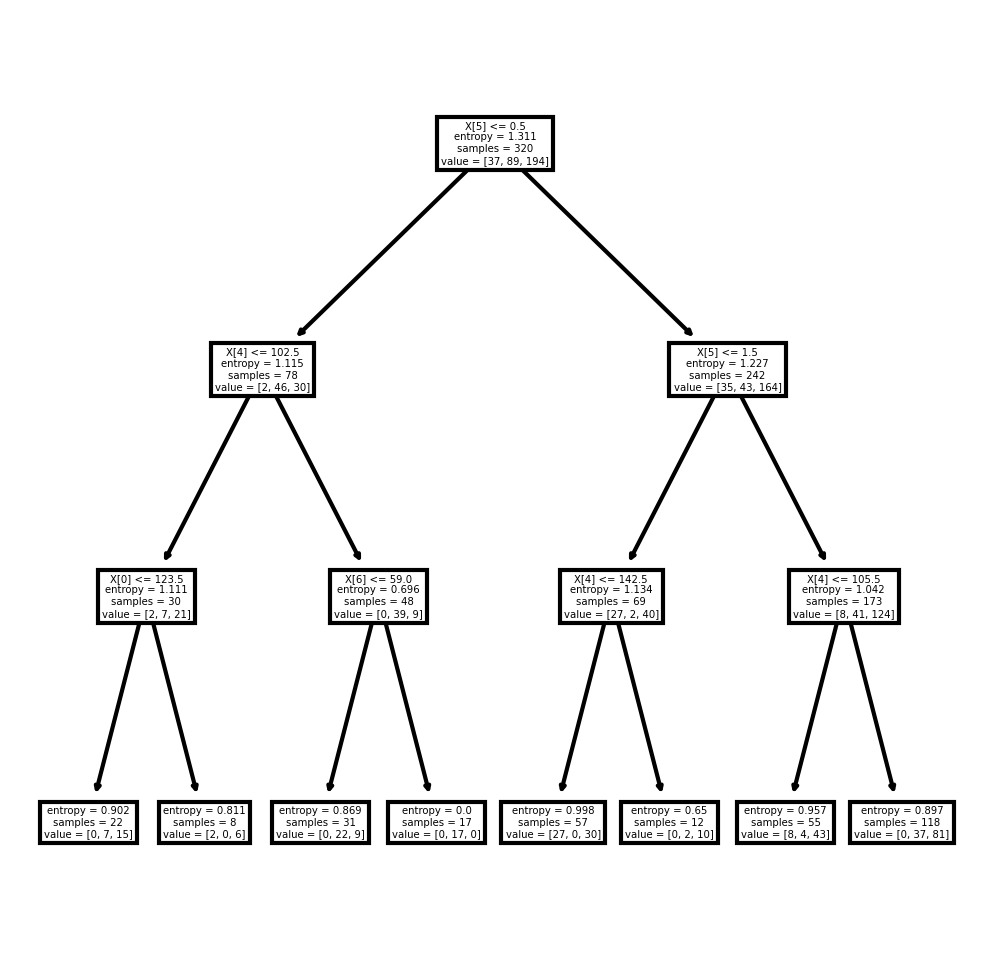

In [66]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#PLot the decision tree
tree.plot_tree(model_en);

In [67]:
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 10]})

In [68]:
print(accuracy_score(y_test,y_test_pred))

0.4625


In [69]:
model_cv=DecisionTreeClassifier(criterion="gini",max_depth=10)

In [70]:
model_cv = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_cv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

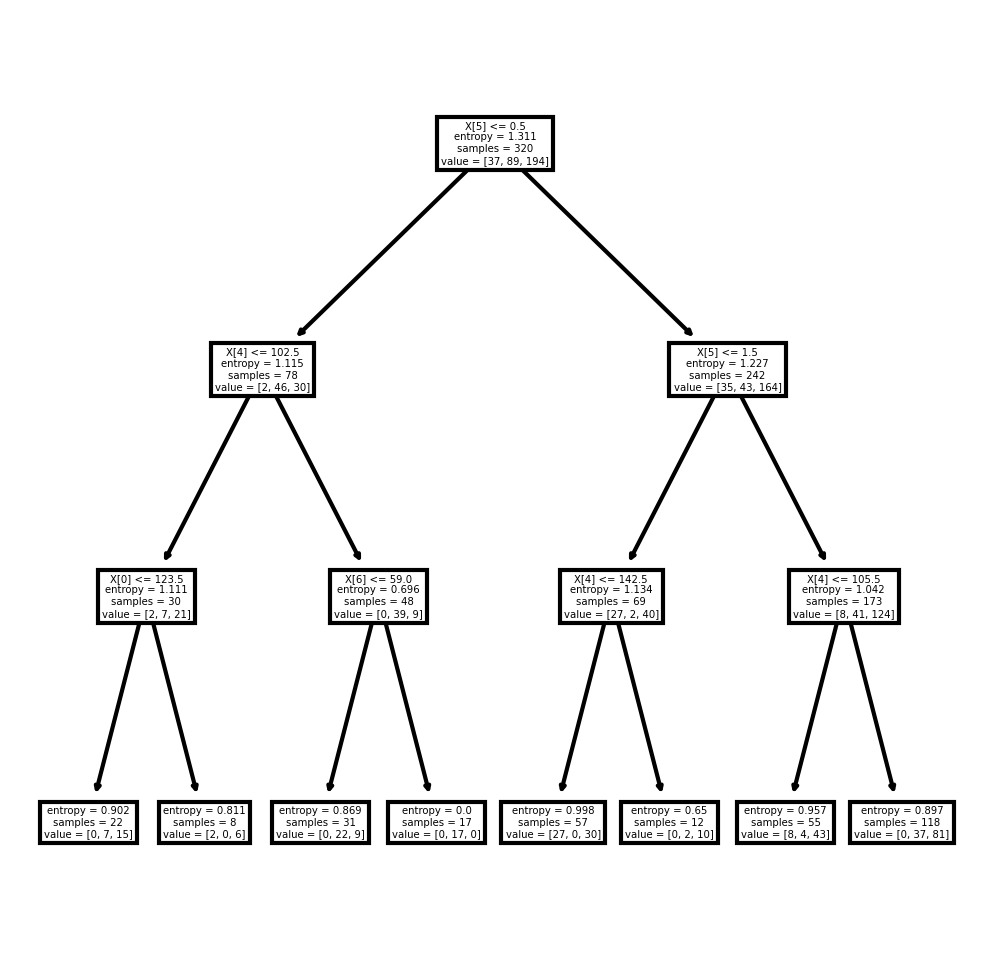

In [71]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(model_cv);

In [72]:
model_cv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [73]:
y_train_pred_cv=model_cv.predict(x_train)

In [74]:
accuracy_score(y_train,y_train_pred_cv)

0.7

In [75]:
y_test_pred_cv=model_cv.predict(x_test)

In [111]:
accuracy_score(y_test,y_test_pred_cv)

0.6625

In [76]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

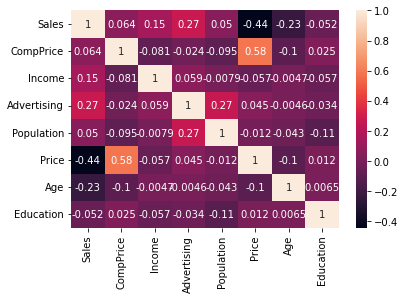

In [77]:
sns.heatmap(company.corr(),annot=True)